In [1]:
classnames = [tmp.lower() for tmp in ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']]
print(classnames)

['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']


In [14]:
import warnings
warnings.filterwarnings("ignore")
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torchvision.models as models
# https://pytorch.org/vision/stable/models.html
           
model_cnn = models.resnet18(pretrained=False)
model_cnn.fc = nn.Linear(model_cnn.fc.in_features, 7)



# 步驟0. 是否使用CUDA 
use_cuda = 1
device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")
print(device)



# 步驟1. data loader處理 
mytransform_woDA = transforms.Compose([
            transforms.Resize((48,48)),
            transforms.ToTensor()
            ])

model_cnn = models.resnet18(pretrained=True)
model_cnn.fc = nn.Linear(model_cnn.fc.in_features, 7)
model_cnn = model_cnn.to(device)

checkpoints = torch.load( './ModelWeight/Model_resnet18_withpretrain_fer2013_scheduler.pth', map_location=device)
model_cnn.load_state_dict(checkpoints['model_dict'])



cuda


<All keys matched successfully>

-------------------------------------------


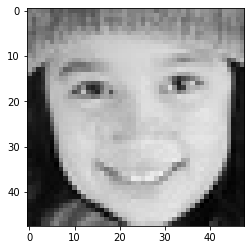

torch.Size([3, 48, 48])
CNN: probability for angry: 0.0000%
CNN: probability for disgust: 0.0000%
CNN: probability for fear: 0.0001%
CNN: probability for happy: 99.9860%
CNN: probability for sad: 0.0000%
CNN: probability for surprise: 0.0037%
CNN: probability for neutral: 0.0101%
-------------------------------------------


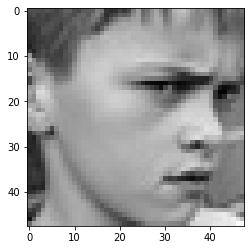

torch.Size([3, 48, 48])
CNN: probability for angry: 99.9402%
CNN: probability for disgust: 0.0000%
CNN: probability for fear: 0.0003%
CNN: probability for happy: 0.0000%
CNN: probability for sad: 0.0566%
CNN: probability for surprise: 0.0000%
CNN: probability for neutral: 0.0028%
-------------------------------------------


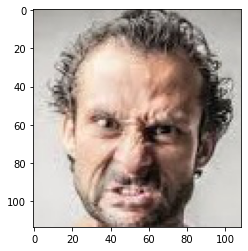

torch.Size([3, 48, 48])
CNN: probability for angry: 0.7526%
CNN: probability for disgust: 0.0209%
CNN: probability for fear: 1.7151%
CNN: probability for happy: 89.1072%
CNN: probability for sad: 0.8200%
CNN: probability for surprise: 0.8699%
CNN: probability for neutral: 6.7143%
-------------------------------------------


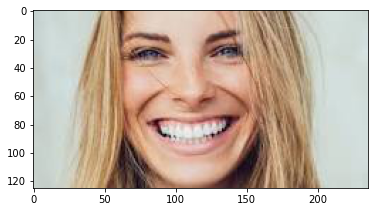

torch.Size([3, 48, 48])
CNN: probability for angry: 53.4906%
CNN: probability for disgust: 0.4078%
CNN: probability for fear: 32.4284%
CNN: probability for happy: 6.3957%
CNN: probability for sad: 0.3642%
CNN: probability for surprise: 6.7607%
CNN: probability for neutral: 0.1527%
-------------------------------------------


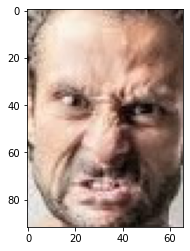

torch.Size([3, 48, 48])
CNN: probability for angry: 97.4442%
CNN: probability for disgust: 0.0477%
CNN: probability for fear: 0.1889%
CNN: probability for happy: 1.7548%
CNN: probability for sad: 0.2214%
CNN: probability for surprise: 0.0141%
CNN: probability for neutral: 0.3289%
-------------------------------------------


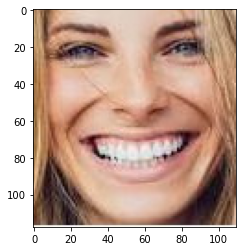

torch.Size([3, 48, 48])
CNN: probability for angry: 0.0018%
CNN: probability for disgust: 0.0000%
CNN: probability for fear: 0.0026%
CNN: probability for happy: 99.8738%
CNN: probability for sad: 0.0011%
CNN: probability for surprise: 0.0753%
CNN: probability for neutral: 0.0453%


In [17]:

mytransform = transforms.Compose([
        transforms.Resize((48,48)),
        transforms.ToTensor()
        ])
model_cnn.eval() 

image_names = ['./Image/Training_430147.jpg','./Image/Training_3264623.jpg','./Image/angry.jpg','./Image/smile.jpg','./Image/angry2.jpg','./Image/smile2.jpg']
for image_name in image_names:
    print('-------------------------------------------')
    image = Image.open(image_name, mode='r')
    image = image.convert('RGB')
    plt.imshow(image)
    plt.show()
    image = mytransform(image)
    tmp = image[0,:,:]*0.299+image[1,:,:]*0.587+image[2,:,:]*0.114
    image[0,:,:]=tmp
    image[1,:,:]=tmp
    image[2,:,:]=tmp
    print(image.shape)
    with torch.no_grad():
        output_cnn = model_cnn(torch.unsqueeze(image,dim=0).to(device))
    output_cnn= F.softmax(output_cnn)
    for i, tmp_out in enumerate(output_cnn[0]):
        print('CNN: probability for {}: {:.4f}%'.format(classnames[i], tmp_out*100))

In [20]:
dummy_input = torch.randn(1, 3,48,48)
model_cnn = model_cnn.to(torch.device("cpu"))
torch.onnx.export(model_cnn, dummy_input, "Model_resnet18_withpretrain_fer2013_scheduler.onnx")
